# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [23]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

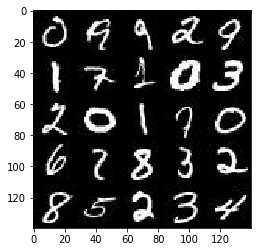

In [24]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

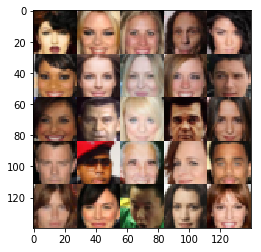

In [25]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [26]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [131]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function

    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='input_real')
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    learning_rate = tf.placeholder(tf.float32, name='lr')
    return inputs_real, inputs_z, learning_rate
    #return None, None, None


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the generator, tensor logits of the generator).

In [132]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function

    alpha = 0.2
    with tf.variable_scope('discriminator', reuse=reuse):
        # Input layer is 28*28*channels
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        relu1 = tf.maximum(alpha*x1, x1)
        # Now is 14x14x64
        
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha*bn2, bn2)
        # Now is 7x7x128
        
    
        # Flatten
        #flatten = tf.contrib.layers.flatten(relu2)
        flatten = tf.reshape(relu2, (-1, 7*7*128))
        
        # Fully connected layer
        logits = tf.layers.dense(flatten, 1)
        output = tf.sigmoid(logits)
        
        
    return output, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [133]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    
    alpha = 0.2
    reuse = not is_train
    with tf.variable_scope('generator', reuse=reuse):
        # First fully connected layer
        x1 = tf.layers.dense(z, 7*7*128)
        
        # Reshape
        x2 = tf.reshape(x1, [-1, 7, 7, 128])
        #x2 = tf.contrib.layers.flatten(x2)
        bn2 = tf.layers.batch_normalization(x2, training=is_train)
        relu2 = tf.maximum(alpha*bn2, bn2)
        # Now is 7x7x128
        
        x3 = tf.layers.conv2d_transpose(relu2, 64, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=is_train)
        relu3 = tf.maximum(alpha*bn3, bn3)
        # Now is 14*14*64
        
        # Output layer
        logits = tf.layers.conv2d_transpose(relu3, out_channel_dim, 5, strides=2, padding='same')
        # Now is 28*28*3
        
        output = tf.tanh(logits)
        
        
    return output

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [134]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real, reuse=False)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))
    d_loss = d_loss_real + d_loss_fake
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [135]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
    g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [136]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [137]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    n_samples, width, height, channels = data_shape
    input_real, input_z, learn_rate = model_inputs(width, height, channels, z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, channels)
    d_opt, g_opt = model_opt(d_loss, g_loss, learn_rate, beta1)
    
    steps = 0
    show_every = 100
    print_every = 10
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                batch_images *= 2
                # TODO: Train Model
                steps += 1
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, learn_rate: learning_rate})
                _ = sess.run(g_opt, feed_dict={input_real: batch_images, input_z: batch_z, learn_rate: learning_rate})

                if steps % show_every == 0:
                    n_images = 25
                    show_generator_output(sess, n_images, input_z, channels, data_image_mode)

                if steps % print_every == 0:
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

In [87]:
batch_size = 128
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

Epoch 0/2... Discriminator Loss: 0.3062... Generator Loss: 1.7801
Epoch 0/2... Discriminator Loss: 0.0716... Generator Loss: 3.7547


KeyboardInterrupt: 

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 0/1... Discriminator Loss: 1.0246... Generator Loss: 0.6393
Epoch 0/1... Discriminator Loss: 0.6234... Generator Loss: 1.1083
Epoch 0/1... Discriminator Loss: 0.4924... Generator Loss: 1.3672
Epoch 0/1... Discriminator Loss: 0.4679... Generator Loss: 1.3515
Epoch 0/1... Discriminator Loss: 0.2871... Generator Loss: 2.0116
Epoch 0/1... Discriminator Loss: 0.4117... Generator Loss: 1.8221
Epoch 0/1... Discriminator Loss: 0.4174... Generator Loss: 2.1076
Epoch 0/1... Discriminator Loss: 0.6301... Generator Loss: 2.2100
Epoch 0/1... Discriminator Loss: 0.6636... Generator Loss: 1.2007


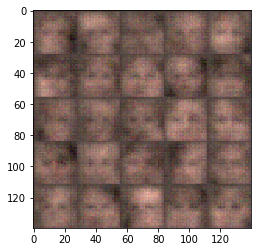

Epoch 0/1... Discriminator Loss: 0.8850... Generator Loss: 0.8149
Epoch 0/1... Discriminator Loss: 0.6824... Generator Loss: 1.4892
Epoch 0/1... Discriminator Loss: 0.6494... Generator Loss: 1.4751
Epoch 0/1... Discriminator Loss: 0.5776... Generator Loss: 2.0270
Epoch 0/1... Discriminator Loss: 0.8002... Generator Loss: 1.4203
Epoch 0/1... Discriminator Loss: 0.8306... Generator Loss: 2.3201
Epoch 0/1... Discriminator Loss: 0.7749... Generator Loss: 0.9277
Epoch 0/1... Discriminator Loss: 0.7424... Generator Loss: 0.9042
Epoch 0/1... Discriminator Loss: 0.6385... Generator Loss: 1.8566
Epoch 0/1... Discriminator Loss: 0.5706... Generator Loss: 1.5698


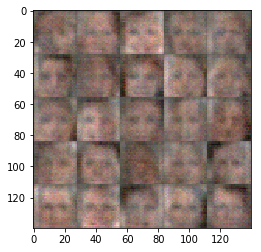

Epoch 0/1... Discriminator Loss: 1.1355... Generator Loss: 0.5159
Epoch 0/1... Discriminator Loss: 1.0507... Generator Loss: 0.8961
Epoch 0/1... Discriminator Loss: 1.0414... Generator Loss: 1.1759
Epoch 0/1... Discriminator Loss: 0.8615... Generator Loss: 1.1413
Epoch 0/1... Discriminator Loss: 0.9260... Generator Loss: 1.0040
Epoch 0/1... Discriminator Loss: 0.9408... Generator Loss: 1.0701
Epoch 0/1... Discriminator Loss: 0.9995... Generator Loss: 1.2297
Epoch 0/1... Discriminator Loss: 1.0050... Generator Loss: 0.9027
Epoch 0/1... Discriminator Loss: 1.0402... Generator Loss: 0.9161
Epoch 0/1... Discriminator Loss: 1.0833... Generator Loss: 0.6850


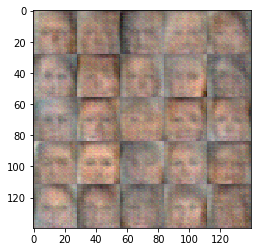

Epoch 0/1... Discriminator Loss: 1.0781... Generator Loss: 0.9134
Epoch 0/1... Discriminator Loss: 1.1283... Generator Loss: 0.7876
Epoch 0/1... Discriminator Loss: 1.0622... Generator Loss: 0.8699
Epoch 0/1... Discriminator Loss: 1.0627... Generator Loss: 0.7500
Epoch 0/1... Discriminator Loss: 1.0088... Generator Loss: 1.5502
Epoch 0/1... Discriminator Loss: 1.1503... Generator Loss: 1.3034
Epoch 0/1... Discriminator Loss: 1.0261... Generator Loss: 0.7967
Epoch 0/1... Discriminator Loss: 1.0975... Generator Loss: 0.8977
Epoch 0/1... Discriminator Loss: 1.0360... Generator Loss: 0.7645
Epoch 0/1... Discriminator Loss: 0.9935... Generator Loss: 1.6591


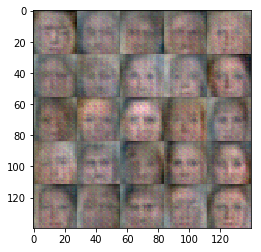

Epoch 0/1... Discriminator Loss: 0.9971... Generator Loss: 0.8691
Epoch 0/1... Discriminator Loss: 0.9804... Generator Loss: 1.1135
Epoch 0/1... Discriminator Loss: 1.1696... Generator Loss: 1.0294
Epoch 0/1... Discriminator Loss: 1.1053... Generator Loss: 0.7758
Epoch 0/1... Discriminator Loss: 0.9626... Generator Loss: 1.1604
Epoch 0/1... Discriminator Loss: 1.0644... Generator Loss: 1.5654
Epoch 0/1... Discriminator Loss: 0.8791... Generator Loss: 1.3206
Epoch 0/1... Discriminator Loss: 0.8276... Generator Loss: 0.9535
Epoch 0/1... Discriminator Loss: 0.9526... Generator Loss: 0.9441
Epoch 0/1... Discriminator Loss: 1.1461... Generator Loss: 0.5549


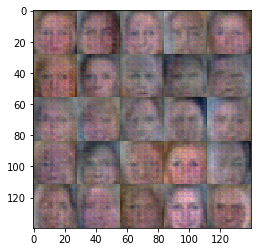

Epoch 0/1... Discriminator Loss: 1.0170... Generator Loss: 0.8254
Epoch 0/1... Discriminator Loss: 0.8144... Generator Loss: 1.0308
Epoch 0/1... Discriminator Loss: 0.7287... Generator Loss: 1.1839
Epoch 0/1... Discriminator Loss: 1.0409... Generator Loss: 1.1631
Epoch 0/1... Discriminator Loss: 0.9952... Generator Loss: 0.7317
Epoch 0/1... Discriminator Loss: 1.2414... Generator Loss: 0.5195
Epoch 0/1... Discriminator Loss: 0.8204... Generator Loss: 1.2089
Epoch 0/1... Discriminator Loss: 0.9046... Generator Loss: 1.1326
Epoch 0/1... Discriminator Loss: 0.9869... Generator Loss: 1.0306
Epoch 0/1... Discriminator Loss: 0.8385... Generator Loss: 1.0648


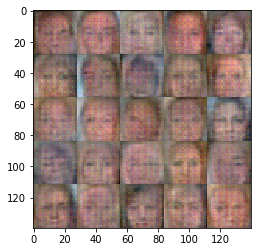

Epoch 0/1... Discriminator Loss: 0.7867... Generator Loss: 1.2585
Epoch 0/1... Discriminator Loss: 1.4120... Generator Loss: 0.4118
Epoch 0/1... Discriminator Loss: 0.8443... Generator Loss: 0.9060
Epoch 0/1... Discriminator Loss: 0.8582... Generator Loss: 1.1795
Epoch 0/1... Discriminator Loss: 0.8387... Generator Loss: 1.4251
Epoch 0/1... Discriminator Loss: 0.8949... Generator Loss: 1.0293
Epoch 0/1... Discriminator Loss: 0.9110... Generator Loss: 0.9938
Epoch 0/1... Discriminator Loss: 0.9049... Generator Loss: 1.0726
Epoch 0/1... Discriminator Loss: 0.8558... Generator Loss: 1.3757
Epoch 0/1... Discriminator Loss: 1.1150... Generator Loss: 0.7248


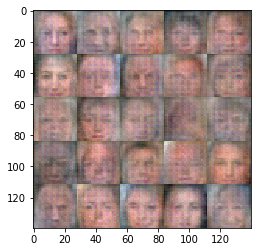

Epoch 0/1... Discriminator Loss: 1.0222... Generator Loss: 0.9379
Epoch 0/1... Discriminator Loss: 0.9902... Generator Loss: 0.8397
Epoch 0/1... Discriminator Loss: 1.0801... Generator Loss: 1.7089
Epoch 0/1... Discriminator Loss: 1.2417... Generator Loss: 0.6292
Epoch 0/1... Discriminator Loss: 1.1190... Generator Loss: 0.8490
Epoch 0/1... Discriminator Loss: 1.3906... Generator Loss: 1.3218
Epoch 0/1... Discriminator Loss: 1.1066... Generator Loss: 1.0958
Epoch 0/1... Discriminator Loss: 1.0343... Generator Loss: 0.9670
Epoch 0/1... Discriminator Loss: 0.9619... Generator Loss: 0.9636
Epoch 0/1... Discriminator Loss: 1.0672... Generator Loss: 0.9307


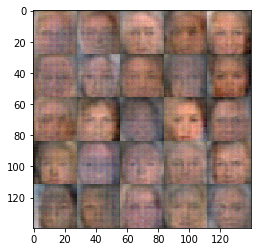

Epoch 0/1... Discriminator Loss: 0.8313... Generator Loss: 1.2120
Epoch 0/1... Discriminator Loss: 1.4099... Generator Loss: 0.5217
Epoch 0/1... Discriminator Loss: 1.1133... Generator Loss: 0.9705
Epoch 0/1... Discriminator Loss: 1.1273... Generator Loss: 0.8649
Epoch 0/1... Discriminator Loss: 1.3352... Generator Loss: 0.7657
Epoch 0/1... Discriminator Loss: 1.1809... Generator Loss: 0.6787
Epoch 0/1... Discriminator Loss: 1.3170... Generator Loss: 0.9581
Epoch 0/1... Discriminator Loss: 1.4484... Generator Loss: 0.5957
Epoch 0/1... Discriminator Loss: 1.4965... Generator Loss: 0.4302
Epoch 0/1... Discriminator Loss: 1.2966... Generator Loss: 0.6972


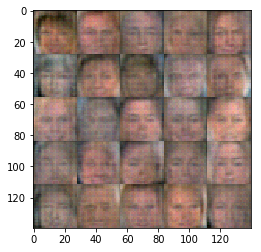

Epoch 0/1... Discriminator Loss: 1.1471... Generator Loss: 0.8085
Epoch 0/1... Discriminator Loss: 1.2300... Generator Loss: 0.7879
Epoch 0/1... Discriminator Loss: 1.0981... Generator Loss: 1.0529
Epoch 0/1... Discriminator Loss: 1.2246... Generator Loss: 0.6324
Epoch 0/1... Discriminator Loss: 1.1939... Generator Loss: 0.9030
Epoch 0/1... Discriminator Loss: 1.1486... Generator Loss: 0.8986
Epoch 0/1... Discriminator Loss: 1.3053... Generator Loss: 0.6806
Epoch 0/1... Discriminator Loss: 1.1070... Generator Loss: 0.9287
Epoch 0/1... Discriminator Loss: 1.2646... Generator Loss: 0.7660
Epoch 0/1... Discriminator Loss: 1.2854... Generator Loss: 0.6023


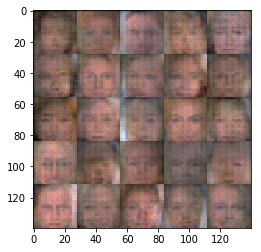

Epoch 0/1... Discriminator Loss: 1.1293... Generator Loss: 1.2338
Epoch 0/1... Discriminator Loss: 1.3085... Generator Loss: 0.6852
Epoch 0/1... Discriminator Loss: 1.2729... Generator Loss: 0.8407
Epoch 0/1... Discriminator Loss: 1.2664... Generator Loss: 0.8392
Epoch 0/1... Discriminator Loss: 1.1170... Generator Loss: 0.9323
Epoch 0/1... Discriminator Loss: 1.2079... Generator Loss: 0.9221
Epoch 0/1... Discriminator Loss: 1.2473... Generator Loss: 0.7063
Epoch 0/1... Discriminator Loss: 1.1569... Generator Loss: 0.7475
Epoch 0/1... Discriminator Loss: 1.2190... Generator Loss: 1.1480
Epoch 0/1... Discriminator Loss: 1.2877... Generator Loss: 0.6760


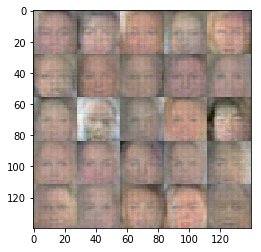

Epoch 0/1... Discriminator Loss: 1.1955... Generator Loss: 0.7787
Epoch 0/1... Discriminator Loss: 1.1790... Generator Loss: 0.7836
Epoch 0/1... Discriminator Loss: 1.1997... Generator Loss: 0.6860
Epoch 0/1... Discriminator Loss: 1.1706... Generator Loss: 0.7520
Epoch 0/1... Discriminator Loss: 1.2458... Generator Loss: 0.7875
Epoch 0/1... Discriminator Loss: 1.0395... Generator Loss: 1.0599
Epoch 0/1... Discriminator Loss: 1.2835... Generator Loss: 0.7778
Epoch 0/1... Discriminator Loss: 1.2268... Generator Loss: 1.3093
Epoch 0/1... Discriminator Loss: 1.1532... Generator Loss: 0.9703
Epoch 0/1... Discriminator Loss: 1.2001... Generator Loss: 0.6831


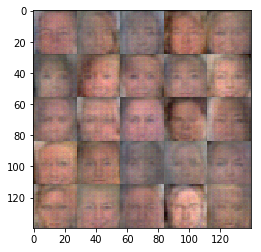

Epoch 0/1... Discriminator Loss: 1.1551... Generator Loss: 0.7848
Epoch 0/1... Discriminator Loss: 1.4186... Generator Loss: 0.4778
Epoch 0/1... Discriminator Loss: 1.1356... Generator Loss: 0.7588
Epoch 0/1... Discriminator Loss: 1.2208... Generator Loss: 0.5569
Epoch 0/1... Discriminator Loss: 1.3643... Generator Loss: 0.5564
Epoch 0/1... Discriminator Loss: 1.2825... Generator Loss: 1.1924
Epoch 0/1... Discriminator Loss: 1.1769... Generator Loss: 0.8363
Epoch 0/1... Discriminator Loss: 1.1811... Generator Loss: 0.9689
Epoch 0/1... Discriminator Loss: 1.2634... Generator Loss: 0.9977
Epoch 0/1... Discriminator Loss: 1.3706... Generator Loss: 0.5690


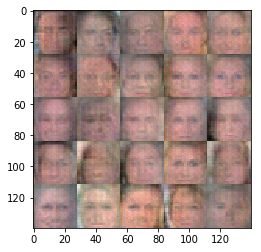

Epoch 0/1... Discriminator Loss: 1.1706... Generator Loss: 0.7576
Epoch 0/1... Discriminator Loss: 1.1917... Generator Loss: 0.9107
Epoch 0/1... Discriminator Loss: 1.1364... Generator Loss: 0.8971
Epoch 0/1... Discriminator Loss: 1.2201... Generator Loss: 0.7467
Epoch 0/1... Discriminator Loss: 1.2327... Generator Loss: 0.6758
Epoch 0/1... Discriminator Loss: 0.9631... Generator Loss: 0.9860
Epoch 0/1... Discriminator Loss: 1.2781... Generator Loss: 1.2643
Epoch 0/1... Discriminator Loss: 1.1637... Generator Loss: 1.1613
Epoch 0/1... Discriminator Loss: 1.2749... Generator Loss: 0.5935
Epoch 0/1... Discriminator Loss: 1.1582... Generator Loss: 0.8008


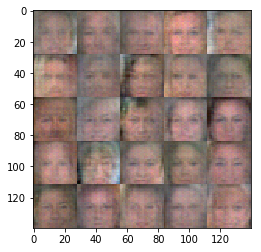

Epoch 0/1... Discriminator Loss: 1.0728... Generator Loss: 0.9837
Epoch 0/1... Discriminator Loss: 1.1796... Generator Loss: 0.7330
Epoch 0/1... Discriminator Loss: 1.0687... Generator Loss: 1.0709
Epoch 0/1... Discriminator Loss: 1.1121... Generator Loss: 0.7954
Epoch 0/1... Discriminator Loss: 0.9917... Generator Loss: 1.1780
Epoch 0/1... Discriminator Loss: 1.1827... Generator Loss: 0.7200
Epoch 0/1... Discriminator Loss: 1.0093... Generator Loss: 1.0622
Epoch 0/1... Discriminator Loss: 1.1856... Generator Loss: 1.0521
Epoch 0/1... Discriminator Loss: 1.2371... Generator Loss: 0.8389
Epoch 0/1... Discriminator Loss: 1.0881... Generator Loss: 1.0618


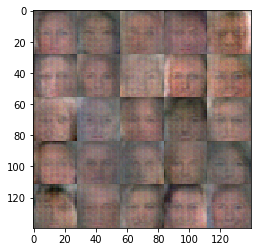

Epoch 0/1... Discriminator Loss: 1.1081... Generator Loss: 0.8865
Epoch 0/1... Discriminator Loss: 1.0832... Generator Loss: 1.2698
Epoch 0/1... Discriminator Loss: 1.1717... Generator Loss: 0.8981
Epoch 0/1... Discriminator Loss: 1.1915... Generator Loss: 0.9305
Epoch 0/1... Discriminator Loss: 1.2747... Generator Loss: 0.6347
Epoch 0/1... Discriminator Loss: 1.1600... Generator Loss: 0.7532
Epoch 0/1... Discriminator Loss: 1.3041... Generator Loss: 0.5830
Epoch 0/1... Discriminator Loss: 0.9936... Generator Loss: 1.0349
Epoch 0/1... Discriminator Loss: 1.3270... Generator Loss: 0.4770
Epoch 0/1... Discriminator Loss: 1.2829... Generator Loss: 0.4878


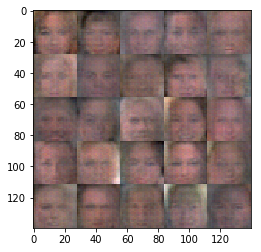

Epoch 0/1... Discriminator Loss: 1.1744... Generator Loss: 0.8740
Epoch 0/1... Discriminator Loss: 1.1507... Generator Loss: 0.8039
Epoch 0/1... Discriminator Loss: 1.1998... Generator Loss: 0.9546
Epoch 0/1... Discriminator Loss: 1.2760... Generator Loss: 0.9912
Epoch 0/1... Discriminator Loss: 1.2017... Generator Loss: 0.9351
Epoch 0/1... Discriminator Loss: 1.1730... Generator Loss: 0.6164
Epoch 0/1... Discriminator Loss: 1.0988... Generator Loss: 0.8979
Epoch 0/1... Discriminator Loss: 1.0288... Generator Loss: 1.0963
Epoch 0/1... Discriminator Loss: 1.2020... Generator Loss: 0.6450
Epoch 0/1... Discriminator Loss: 1.1221... Generator Loss: 1.0865


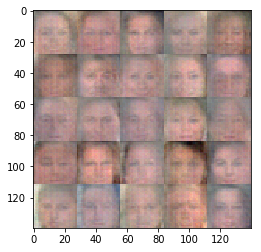

Epoch 0/1... Discriminator Loss: 1.1501... Generator Loss: 0.6571
Epoch 0/1... Discriminator Loss: 1.2295... Generator Loss: 0.6698
Epoch 0/1... Discriminator Loss: 1.2081... Generator Loss: 0.7695
Epoch 0/1... Discriminator Loss: 1.1344... Generator Loss: 0.7944
Epoch 0/1... Discriminator Loss: 1.1696... Generator Loss: 0.8623
Epoch 0/1... Discriminator Loss: 1.3096... Generator Loss: 0.6001
Epoch 0/1... Discriminator Loss: 1.1338... Generator Loss: 0.7798
Epoch 0/1... Discriminator Loss: 1.2811... Generator Loss: 1.2316
Epoch 0/1... Discriminator Loss: 1.0868... Generator Loss: 0.7341
Epoch 0/1... Discriminator Loss: 1.1840... Generator Loss: 0.7462


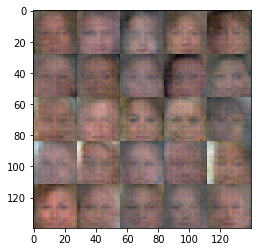

Epoch 0/1... Discriminator Loss: 1.2976... Generator Loss: 0.6457
Epoch 0/1... Discriminator Loss: 1.1148... Generator Loss: 0.9390
Epoch 0/1... Discriminator Loss: 1.1175... Generator Loss: 1.0866
Epoch 0/1... Discriminator Loss: 1.2688... Generator Loss: 0.6124
Epoch 0/1... Discriminator Loss: 1.1031... Generator Loss: 0.9049
Epoch 0/1... Discriminator Loss: 1.2500... Generator Loss: 0.5400
Epoch 0/1... Discriminator Loss: 1.2800... Generator Loss: 0.9648
Epoch 0/1... Discriminator Loss: 1.2217... Generator Loss: 1.0056
Epoch 0/1... Discriminator Loss: 1.0054... Generator Loss: 1.0125
Epoch 0/1... Discriminator Loss: 1.1131... Generator Loss: 1.3118


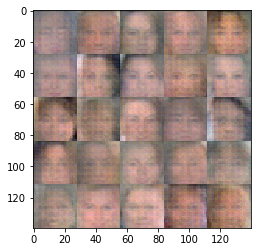

Epoch 0/1... Discriminator Loss: 1.0329... Generator Loss: 1.2945
Epoch 0/1... Discriminator Loss: 1.2214... Generator Loss: 0.7915
Epoch 0/1... Discriminator Loss: 0.9715... Generator Loss: 1.0186
Epoch 0/1... Discriminator Loss: 1.0847... Generator Loss: 0.9549
Epoch 0/1... Discriminator Loss: 1.1747... Generator Loss: 0.6480
Epoch 0/1... Discriminator Loss: 1.2354... Generator Loss: 0.7834
Epoch 0/1... Discriminator Loss: 1.1174... Generator Loss: 0.7757
Epoch 0/1... Discriminator Loss: 1.0815... Generator Loss: 0.9038
Epoch 0/1... Discriminator Loss: 1.2030... Generator Loss: 0.6538
Epoch 0/1... Discriminator Loss: 1.3821... Generator Loss: 0.5661


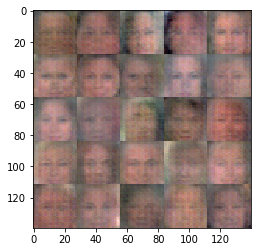

Epoch 0/1... Discriminator Loss: 1.0652... Generator Loss: 0.8314
Epoch 0/1... Discriminator Loss: 1.1832... Generator Loss: 0.9187
Epoch 0/1... Discriminator Loss: 0.9930... Generator Loss: 1.1146
Epoch 0/1... Discriminator Loss: 1.1163... Generator Loss: 0.7416
Epoch 0/1... Discriminator Loss: 1.2909... Generator Loss: 1.2895
Epoch 0/1... Discriminator Loss: 1.1166... Generator Loss: 1.0388
Epoch 0/1... Discriminator Loss: 1.1337... Generator Loss: 0.8678
Epoch 0/1... Discriminator Loss: 1.2437... Generator Loss: 0.8181
Epoch 0/1... Discriminator Loss: 1.0733... Generator Loss: 1.0024
Epoch 0/1... Discriminator Loss: 1.2215... Generator Loss: 0.9413


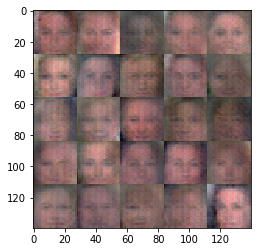

Epoch 0/1... Discriminator Loss: 1.0703... Generator Loss: 0.8604
Epoch 0/1... Discriminator Loss: 1.4224... Generator Loss: 0.4388
Epoch 0/1... Discriminator Loss: 1.3962... Generator Loss: 0.7598
Epoch 0/1... Discriminator Loss: 1.1976... Generator Loss: 0.8036
Epoch 0/1... Discriminator Loss: 1.1925... Generator Loss: 0.7523
Epoch 0/1... Discriminator Loss: 1.3472... Generator Loss: 0.4932
Epoch 0/1... Discriminator Loss: 1.1809... Generator Loss: 0.7881
Epoch 0/1... Discriminator Loss: 1.1749... Generator Loss: 1.2954
Epoch 0/1... Discriminator Loss: 1.3148... Generator Loss: 0.5707
Epoch 0/1... Discriminator Loss: 1.5087... Generator Loss: 0.6032


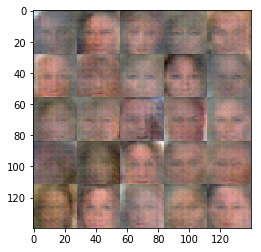

Epoch 0/1... Discriminator Loss: 1.2641... Generator Loss: 1.1844
Epoch 0/1... Discriminator Loss: 1.2382... Generator Loss: 0.8317
Epoch 0/1... Discriminator Loss: 0.9960... Generator Loss: 1.2465
Epoch 0/1... Discriminator Loss: 1.2154... Generator Loss: 0.5946
Epoch 0/1... Discriminator Loss: 1.2075... Generator Loss: 0.7421
Epoch 0/1... Discriminator Loss: 1.1909... Generator Loss: 0.8196
Epoch 0/1... Discriminator Loss: 1.2831... Generator Loss: 0.5973
Epoch 0/1... Discriminator Loss: 1.2397... Generator Loss: 0.5851
Epoch 0/1... Discriminator Loss: 1.1489... Generator Loss: 0.8824
Epoch 0/1... Discriminator Loss: 1.1254... Generator Loss: 0.8511


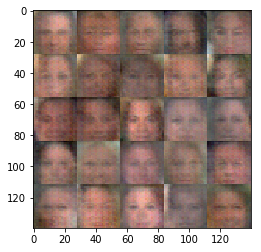

Epoch 0/1... Discriminator Loss: 1.2128... Generator Loss: 0.8035
Epoch 0/1... Discriminator Loss: 1.1642... Generator Loss: 1.2355
Epoch 0/1... Discriminator Loss: 1.1251... Generator Loss: 0.8352
Epoch 0/1... Discriminator Loss: 1.0850... Generator Loss: 0.9847
Epoch 0/1... Discriminator Loss: 1.1518... Generator Loss: 0.7884
Epoch 0/1... Discriminator Loss: 1.1047... Generator Loss: 0.7921
Epoch 0/1... Discriminator Loss: 1.2895... Generator Loss: 0.6598
Epoch 0/1... Discriminator Loss: 1.1296... Generator Loss: 0.8721
Epoch 0/1... Discriminator Loss: 1.0714... Generator Loss: 0.7855
Epoch 0/1... Discriminator Loss: 1.2676... Generator Loss: 0.9102


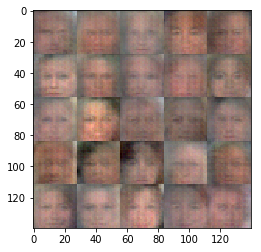

Epoch 0/1... Discriminator Loss: 1.3322... Generator Loss: 0.7469
Epoch 0/1... Discriminator Loss: 1.0802... Generator Loss: 0.9135
Epoch 0/1... Discriminator Loss: 0.9692... Generator Loss: 1.1093
Epoch 0/1... Discriminator Loss: 1.1207... Generator Loss: 0.7837
Epoch 0/1... Discriminator Loss: 1.2129... Generator Loss: 0.6028
Epoch 0/1... Discriminator Loss: 1.3123... Generator Loss: 0.5858
Epoch 0/1... Discriminator Loss: 1.2640... Generator Loss: 0.8667
Epoch 0/1... Discriminator Loss: 1.3024... Generator Loss: 0.6628
Epoch 0/1... Discriminator Loss: 1.1017... Generator Loss: 0.8434
Epoch 0/1... Discriminator Loss: 1.3575... Generator Loss: 0.5421


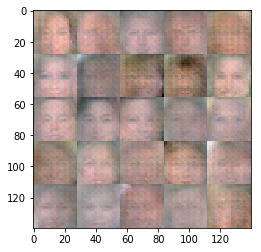

Epoch 0/1... Discriminator Loss: 0.9563... Generator Loss: 1.1423
Epoch 0/1... Discriminator Loss: 1.1202... Generator Loss: 0.9897
Epoch 0/1... Discriminator Loss: 1.0524... Generator Loss: 1.1154
Epoch 0/1... Discriminator Loss: 1.2752... Generator Loss: 0.5548
Epoch 0/1... Discriminator Loss: 1.0958... Generator Loss: 1.0107
Epoch 0/1... Discriminator Loss: 1.0538... Generator Loss: 0.9911
Epoch 0/1... Discriminator Loss: 1.1100... Generator Loss: 1.1485
Epoch 0/1... Discriminator Loss: 1.0406... Generator Loss: 1.0635
Epoch 0/1... Discriminator Loss: 1.1691... Generator Loss: 0.7932
Epoch 0/1... Discriminator Loss: 1.1060... Generator Loss: 0.9345


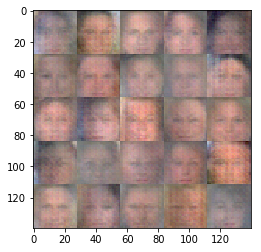

Epoch 0/1... Discriminator Loss: 1.2317... Generator Loss: 1.1102
Epoch 0/1... Discriminator Loss: 1.1678... Generator Loss: 0.7531
Epoch 0/1... Discriminator Loss: 1.2068... Generator Loss: 0.7996
Epoch 0/1... Discriminator Loss: 1.2360... Generator Loss: 0.6082
Epoch 0/1... Discriminator Loss: 1.4140... Generator Loss: 0.9211
Epoch 0/1... Discriminator Loss: 1.2725... Generator Loss: 0.7887
Epoch 0/1... Discriminator Loss: 1.2089... Generator Loss: 0.8737
Epoch 0/1... Discriminator Loss: 1.1021... Generator Loss: 0.8691
Epoch 0/1... Discriminator Loss: 1.3381... Generator Loss: 0.8148
Epoch 0/1... Discriminator Loss: 1.1642... Generator Loss: 0.8937


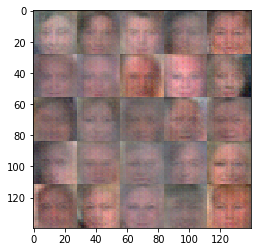

Epoch 0/1... Discriminator Loss: 1.2954... Generator Loss: 0.5526
Epoch 0/1... Discriminator Loss: 1.1923... Generator Loss: 0.7097
Epoch 0/1... Discriminator Loss: 1.1547... Generator Loss: 0.7687
Epoch 0/1... Discriminator Loss: 1.3073... Generator Loss: 0.5932
Epoch 0/1... Discriminator Loss: 1.0563... Generator Loss: 1.0052
Epoch 0/1... Discriminator Loss: 1.0638... Generator Loss: 0.9099
Epoch 0/1... Discriminator Loss: 1.3601... Generator Loss: 0.5961
Epoch 0/1... Discriminator Loss: 1.1742... Generator Loss: 1.0755
Epoch 0/1... Discriminator Loss: 1.3057... Generator Loss: 0.5090
Epoch 0/1... Discriminator Loss: 1.1078... Generator Loss: 0.9983


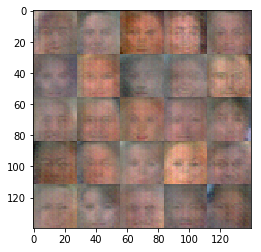

Epoch 0/1... Discriminator Loss: 1.2479... Generator Loss: 0.8835
Epoch 0/1... Discriminator Loss: 1.0385... Generator Loss: 0.9984
Epoch 0/1... Discriminator Loss: 1.2096... Generator Loss: 0.5712
Epoch 0/1... Discriminator Loss: 1.1941... Generator Loss: 1.0423
Epoch 0/1... Discriminator Loss: 0.8667... Generator Loss: 1.0661
Epoch 0/1... Discriminator Loss: 0.9030... Generator Loss: 1.0374
Epoch 0/1... Discriminator Loss: 1.1815... Generator Loss: 0.6870
Epoch 0/1... Discriminator Loss: 1.1244... Generator Loss: 1.1288
Epoch 0/1... Discriminator Loss: 0.8098... Generator Loss: 1.1613
Epoch 0/1... Discriminator Loss: 1.1430... Generator Loss: 0.8087


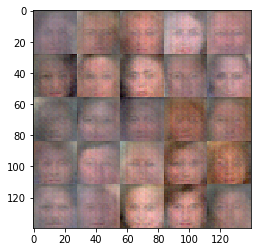

Epoch 0/1... Discriminator Loss: 1.3056... Generator Loss: 0.6119
Epoch 0/1... Discriminator Loss: 1.2410... Generator Loss: 0.6867
Epoch 0/1... Discriminator Loss: 1.2438... Generator Loss: 0.6875
Epoch 0/1... Discriminator Loss: 1.0409... Generator Loss: 0.9178
Epoch 0/1... Discriminator Loss: 1.1492... Generator Loss: 0.8889
Epoch 0/1... Discriminator Loss: 1.1191... Generator Loss: 1.0248
Epoch 0/1... Discriminator Loss: 1.1351... Generator Loss: 0.7842
Epoch 0/1... Discriminator Loss: 1.2370... Generator Loss: 0.9437
Epoch 0/1... Discriminator Loss: 1.2854... Generator Loss: 0.8978
Epoch 0/1... Discriminator Loss: 1.3339... Generator Loss: 0.7370


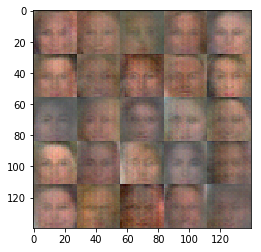

Epoch 0/1... Discriminator Loss: 1.0740... Generator Loss: 0.9746
Epoch 0/1... Discriminator Loss: 1.1208... Generator Loss: 0.8161
Epoch 0/1... Discriminator Loss: 1.0641... Generator Loss: 1.2213
Epoch 0/1... Discriminator Loss: 1.2580... Generator Loss: 0.5457
Epoch 0/1... Discriminator Loss: 1.0811... Generator Loss: 0.7444
Epoch 0/1... Discriminator Loss: 1.2838... Generator Loss: 0.7098
Epoch 0/1... Discriminator Loss: 1.2076... Generator Loss: 0.7143
Epoch 0/1... Discriminator Loss: 1.0235... Generator Loss: 0.8715
Epoch 0/1... Discriminator Loss: 1.0883... Generator Loss: 0.8892
Epoch 0/1... Discriminator Loss: 1.1440... Generator Loss: 0.8261


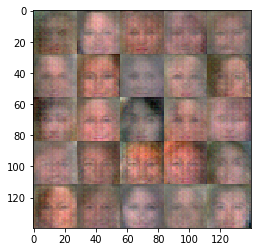

Epoch 0/1... Discriminator Loss: 1.2884... Generator Loss: 0.8132
Epoch 0/1... Discriminator Loss: 0.9871... Generator Loss: 1.0554
Epoch 0/1... Discriminator Loss: 0.9830... Generator Loss: 1.3165
Epoch 0/1... Discriminator Loss: 1.1758... Generator Loss: 0.7965
Epoch 0/1... Discriminator Loss: 1.1652... Generator Loss: 0.6885
Epoch 0/1... Discriminator Loss: 1.1099... Generator Loss: 1.2203
Epoch 0/1... Discriminator Loss: 1.2070... Generator Loss: 0.8496


In [138]:
batch_size = 64
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

tf.reset_default_graph()

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.